In [14]:
import bldw
import glob
import numpy as np
import blimpy as bl
import matplotlib.pyplot as plt
import pandas as pd
import setigen
import os
import turbo_seti
import shutil
%matplotlib inline

import turbo_seti.find_doppler.seti_event as turbo
import turbo_seti.find_event as find
from turbo_seti.find_event import plot_event
from turbo_seti.find_doppler.find_doppler import FindDoppler
from turbo_seti.find_event.find_event_pipeline import find_event_pipeline
from turbo_seti.find_event.plot_event_pipeline import plot_event_pipeline

In [2]:
#hit_dats = np.load('/datax/scratch/benjb/C23_L_unique_dat_list.npy', allow_pickle=True)[:,1]

#for dat in np.unique(hit_dats):
#    shutil.copy(dat, '/datax/scratch/benjb/C23_L_dats_test/')

In [5]:
#print(len(hit_dats))

1917903


In [3]:
'''dat_paths = glob.glob('/datax/scratch/benjb/C23_L_dats_test/*.dat')
print(len(dat_paths))
counter = 0
out_of_range_counter = 0
for ii, dat_path in enumerate(dat_paths):
    #if ii%100 == 0:
    #    print(ii)
    df_dat = pd.read_table(dat_path, sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',
                                                    'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 
                                                    'Full_number_of_hits'], skiprows=9)
    freqs = df_dat['Uncorrected_Frequency'].values
    freqs_in_range = freqs[np.where(((freqs > 1100) & (freqs < 1200)) |
             ((freqs > 1340) & (freqs < 1900)))[0]]
    out_of_range_counter += len(freqs)
    counter += len(freqs_in_range)
    #print(freqs)
print(f'{out_of_range_counter} hits in /C23_L_dats_test/')
print(f'{counter} hits inside sensitive frequency range in /C23_L_dats_test/')'''

3078
2682205 hits in /C23_L_dats_test/
1918067 hits inside sensitive frequency range in /C23_L_dats_test/


In [7]:
dat_paths = glob.glob('/datax/scratch/benjb/C23_L_dats_after_8_HDB_epochs/*.dat')
print(len(dat_paths))
counter = 0
out_of_range_counter = 0
for ii, dat_path in enumerate(dat_paths):
    #if ii%100 == 0:
    #    print(ii)
    df_dat = pd.read_table(dat_path, sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',
                                                    'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 
                                                    'Full_number_of_hits'], skiprows=9)
    freqs = df_dat['Uncorrected_Frequency'].values
    freqs_in_range = freqs[np.where(((freqs > 1100.05) & (freqs < 1200)) |
             ((freqs > 1340) & (freqs < 1899.95)))[0]]
    out_of_range_counter += len(freqs)
    counter += len(freqs_in_range)
    #print(freqs)
print(out_of_range_counter)
print(counter)

3078
899898
135757


In [2]:
csvf_paths = glob.glob('/datax/scratch/benjb/C23_L_dats_after_8_HDB_epochs/C23_L_csvs_offs_uncut/*_3.csv')
#csvf_paths = glob.glob('/datax/scratch/benjb/C23_L_dats_with_duplicates/*.csv')
for csvf_path in csvf_paths:
    print(csvf_path)

/datax/scratch/benjb/C23_L_dats_after_8_HDB_epochs/C23_L_csvs_offs_uncut/24777_DDO210_splic_found_event_table_3.csv
/datax/scratch/benjb/C23_L_dats_after_8_HDB_epochs/C23_L_csvs_offs_uncut/24783_NGC7454_splic_found_event_table_3.csv
/datax/scratch/benjb/C23_L_dats_after_8_HDB_epochs/C23_L_csvs_offs_uncut/35217_UMIN_splic_found_event_table_3.csv
/datax/scratch/benjb/C23_L_dats_after_8_HDB_epochs/C23_L_csvs_offs_uncut/47055_AND_X_blc75_found_event_table_3.csv
/datax/scratch/benjb/C23_L_dats_after_8_HDB_epochs/C23_L_csvs_offs_uncut/47079_AND_XVI_blc75_found_event_table_3.csv
/datax/scratch/benjb/C23_L_dats_after_8_HDB_epochs/C23_L_csvs_offs_uncut/47085_AND_XIV_blc71_found_event_table_3.csv
/datax/scratch/benjb/C23_L_dats_after_8_HDB_epochs/C23_L_csvs_offs_uncut/47085_AND_XIV_blc75_found_event_table_3.csv
/datax/scratch/benjb/C23_L_dats_after_8_HDB_epochs/C23_L_csvs_offs_uncut/47085_AND_XIV_blc76_found_event_table_3.csv
/datax/scratch/benjb/C23_L_dats_after_8_HDB_epochs/C23_L_csvs_offs_unc

In [3]:
print(len(np.unique(csvf_paths)))

67


In [4]:
ff_array = []
#last_5_csvf_paths = []

counter = 0
for csvf_path in csvf_paths:
    event_df = pd.read_csv(csvf_path)
    trimmed_event_df = event_df.iloc[
    np.where((event_df['Freq'].values > 1100) & (event_df['Freq'].values < 1200) |
             (event_df['Freq'].values > 1340) & (event_df['Freq'].values < 1900))[0]
    ]
    #print(trimmed_event_df['Hit_ID'].values)
    #if len(trimmed_event_df['Hit_ID'].values) == 0:
        #continue
    #if not trimmed_event_df["Hit_ID"].values[0] in ['NGC4564_16', 'AND_II_0', 'UGCA127_50', 'HIZSS003_3', 'NGC0628_2']:
        #continue
    counter += len(np.unique(trimmed_event_df["Hit_ID"].values))
    for ii in range(len(np.unique(trimmed_event_df["Hit_ID"].values))):
        ff = trimmed_event_df['Freq'].values[ii]
        print(f'{trimmed_event_df["Hit_ID"].values[ii]}  |  {trimmed_event_df["FileID"].values[ii]}  |  {ff}')
        # some of the FileIDs will say .h5 and some will say .dat.
        # this is derived from the second line of the corresponding .dat file,
        # which is .h5 in some files and .dat in others.
        # this seems like a potentially concerning inconsistency, but
        # I don't think it breaks anything here
        ff_array.append(ff)
    #last_5_csvf_paths.append(csvf_path)
print(counter)
#print(trimmed_event_df['FileID'].values)

IC0342_3  |  blc04_guppi_59082_59628_IC0342_0040.rawspec.0000.dat  |  1420.516013
HIZSS003_3  |  blc04_guppi_59405_62158_HIZSS003_0082.rawspec.0000.h5  |  1420.083624
NGC0628_2  |  blc04_guppi_59405_48425_NGC0628_0040.rawspec.0000.h5  |  1420.555489
3


In [8]:
print(last_5_csvf_paths)

['/datax/scratch/benjb/C23_L_dats_after_8_HDB_epochs/371842_NGC4564_blc04_found_event_table_3.csv', '/datax/scratch/benjb/C23_L_dats_after_8_HDB_epochs/395301_AND_II_blc06_found_event_table_3.csv', '/datax/scratch/benjb/C23_L_dats_after_8_HDB_epochs/395302_UGCA127_blc03_found_event_table_3.csv', '/datax/scratch/benjb/C23_L_dats_after_8_HDB_epochs/395308_HIZSS003_blc04_found_event_table_3.csv', '/datax/scratch/benjb/C23_L_dats_after_8_HDB_epochs/395313_NGC0628_blc04_found_event_table_3.csv']


In [13]:
#trimmed_event_df.keys()

Index(['Unnamed: 0', 'TopHitNum', 'DriftRate', 'SNR', 'Freq', 'ChanIndx',
       'FreqStart', 'FreqEnd', 'CoarseChanNum', 'FullNumHitsInRange', 'FileID',
       'Source', 'MJD', 'RA', 'DEC', 'DELTAT', 'DELTAF', 'max_drift_rate',
       'obs_length', 'Hit_ID', 'status', 'in_n_ons', 'RFI_in_range',
       'delta_t'],
      dtype='object')

In [28]:
'''untrimmed_csvf_path = '/datax/scratch/benjb/C23_L_dats/371878_NGC5845_blc03_found_event_table_3.csv'

target = os.path.basename(untrimmed_csvf_path)[-37:-30]
node = os.path.basename(untrimmed_csvf_path)[-29:-24]
print(target)

event_df = pd.read_csv(untrimmed_csvf_path)
trimmed_event_df = event_df.iloc[
    np.where((event_df['Freq'].values > 1100) & (event_df['Freq'].values < 1200) |
             (event_df['Freq'].values > 1340) & (event_df['Freq'].values < 1900))[0]
    ]
trimmed_event_df.dropna(subset=['in_n_ons'], inplace=True)
trimmed_event_df.to_csv(f'/datax/scratch/benjb/C23_L_dats/{target}_{node}_f3_trimmed.csv')

csvf_path = f'/datax/scratch/benjb/C23_L_dats/{target}_{node}_f3_trimmed.csv'

csv_file = '/home/cgchoza/galaxies/complete_cadences_catalog.csv'

c23_df = pd.read_csv(csv_file)
c23_dfl = c23_df.iloc[np.where(c23_df['Band'].values == 'L')[0]]

cadence_id = np.unique(c23_dfl['Cadence ID'].values[np.where(c23_dfl['Target'].values == target.upper())])
print(cadence_id)

h5_list_path = '/datax/scratch/benjb/C23_L_dats/C23_L_lsts/'+str(cadence_id[0])+'_'+target+'_'+node+'_h5_files.lst'
'''


NGC5845
[371878]


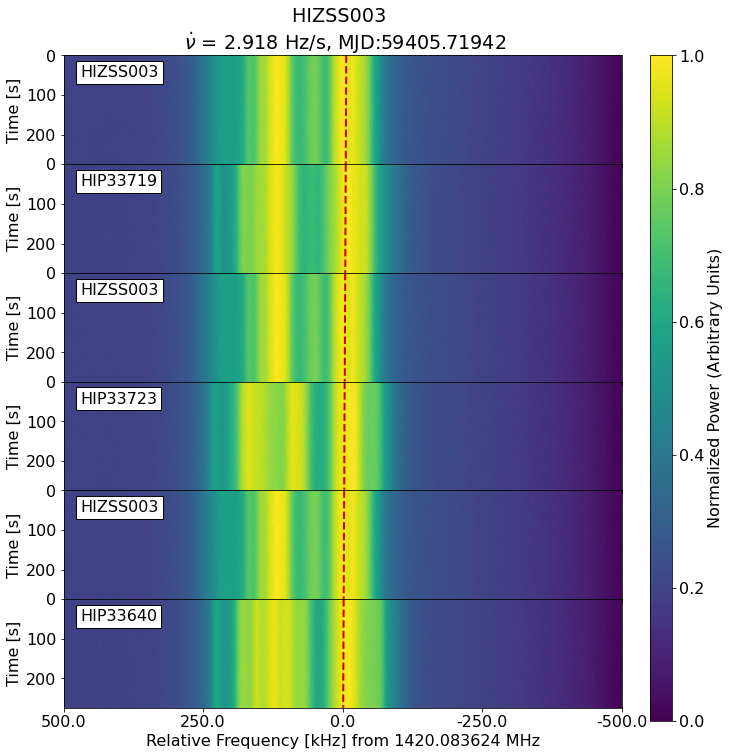

In [19]:
h5_list_path = '/datax/scratch/benjb/C23_L_dats_after_8_HDB_epochs/C23_L_lsts_offs_uncut/395308_HIZSS003_blc04_h5_files.lst'
csvf_path = '/datax/scratch/benjb/C23_L_dats_after_8_HDB_epochs/C23_L_csvs_offs_uncut/395308_HIZSS003_blc04_f3_trimmed.csv'
h5_list = ['/datag/pipeline/AGBT21A_996_47/blc04/blc04_guppi_59405_62158_HIZSS003_0082.rawspec.0000.h5',
            '/datag/pipeline/AGBT21A_996_47/blc04/blc04_guppi_59405_62477_HIP33719_0083.rawspec.0000.h5',
            '/datag/pipeline/AGBT21A_996_47/blc04/blc04_guppi_59405_62796_HIZSS003_0084.rawspec.0000.h5',
            '/datag/pipeline/AGBT21A_996_47/blc04/blc04_guppi_59405_63117_HIP33723_0085.rawspec.0000.h5',
            '/datag/pipeline/AGBT21A_996_47/blc04/blc04_guppi_59405_63438_HIZSS003_0086.rawspec.0000.h5',
            '/datag/pipeline/AGBT21A_996_47/blc04/blc04_guppi_59405_63757_HIP33640_0087.rawspec.0000.h5']
centerfreq = 1420.083624
source_list = ['HIZSS003',
               'HIP33719',
               'HIZSS003',
               'HIP33723',
               'HIZSS003',
               'HIP33640']

plot_event.make_waterfall_plots(fil_file_list = h5_list, 
                                        on_source_name='HIZSS003',
                                        f_start=centerfreq-0.5,
                                        f_stop=centerfreq+0.5,
                                        drift_rate=2.918,
                                        f_mid=1420.077067,
                                        filter_level=3,
                                        source_name_list=source_list,
                                        offset=0,
                                        plot_dir='/datax/scratch/benjb/C23_L_dats_after_8_HDB_epochs/C23_L_pngs_offs_uncut/zoomed_out/') 

In [9]:
csv_file = '/home/cgchoza/BL-TESSsearch/analysis/event_data.csv'

c23_df = pd.read_csv(csv_file)
c23_dfl = c23_df.iloc[np.where(c23_df['Band'].values == 'L')[0]]
c23_dfl = c23_dfl.iloc[
    np.where((c23_dfl['Freq'].values > 1100) & (c23_dfl['Freq'].values < 1200) |
             (c23_dfl['Freq'].values > 1340) & (c23_dfl['Freq'].values < 1900))[0]
    ]
c23_dfl.dropna(subset=['in_n_ons'], inplace=True)
print('Done reading in Carmen\'s CSV.')
#c23_dfl

Done reading in Carmen's CSV.


In [29]:
c23_dfl['Source']

3          DDO210
9          DDO210
15        NGC7454
21         BOL520
24        PEGASUS
          ...    
5473    MESSIER49
5476    MESSIER49
5479    MESSIER49
5482    MESSIER49
5485    MESSIER49
Name: Source, Length: 288, dtype: object

In [32]:
c23_dfl.iloc[np.where(c23_dfl['Source'].values == 'AND_II')[0]]

,Unnamed: 0,Unnamed: 0.1,TopHitNum,DriftRate,SNR,Freq,ChanIndx,FreqStart,FreqEnd,CoarseChanNum,...,DELTAF,max_drift_rate,obs_length,Hit_ID,status,in_n_ons,RFI_in_range,delta_t,Band,FilePath
1118,0,5,6,-3.539601,29.891010,1626.137460,466700,1626.139095,1626.135831,21,...,-2.793968,4.0,292.057776,AND_II_5,on_table_1,2.0,0,0.0,L,/home/obs/events/47091/1688/found_event_table.csv
1120,2,793,794,-0.583556,15.488513,1580.534830,11301,1580.536465,1580.533201,37,...,-2.793968,4.0,292.057776,AND_II_793,on_table_1,2.0,0,0.0,L,/home/obs/events/47091/1688/found_event_table.csv
1123,5,803,804,-0.564423,15.450824,1578.871824,606514,1578.873459,1578.870195,37,...,-2.793968,4.0,292.057776,AND_II_803,on_table_1,2.0,0,0.0,L,/home/obs/events/47091/1688/found_event_table.csv
5074,0,11,12,0.009566,507961.843750,1124.995320,525963,1124.996955,1124.993691,0,...,-2.793968,4.0,292.057776,AND_II_11,on_table_1,2.0,0,0.0,L,/home/obs/events/395301/1126/found_event_table...
5076,2,15,16,0.009566,387.685944,1122.995328,193212,1122.996963,1122.993699,1,...,-2.793968,4.0,292.057776,AND_II_15,on_table_1,2.0,0,0.0,L,/home/obs/events/395301/1126/found_event_table...


['/datax/scratch/benjb/C23', 'L', 'dats', 'after', '8', 'HDB', 'epochs/C23', 'L', 'csvs', 'offs', 'uncut/24777', 'DDO210', 'splic', 'found', 'event', 'table', '3.csv']
24777
DDO210
splic
['/datax/scratch/benjb/C23', 'L', 'dats', 'after', '8', 'HDB', 'epochs/C23', 'L', 'csvs', 'offs', 'uncut/24783', 'NGC7454', 'splic', 'found', 'event', 'table', '3.csv']
24783
NGC7454
splic
['/datax/scratch/benjb/C23', 'L', 'dats', 'after', '8', 'HDB', 'epochs/C23', 'L', 'csvs', 'offs', 'uncut/35217', 'UMIN', 'splic', 'found', 'event', 'table', '3.csv']
35217
UMIN
splic
['/datax/scratch/benjb/C23', 'L', 'dats', 'after', '8', 'HDB', 'epochs/C23', 'L', 'csvs', 'offs', 'uncut/47055', 'AND', 'X', 'blc75', 'found', 'event', 'table', '3.csv']
47055
AND_X
blc75
['/datax/scratch/benjb/C23', 'L', 'dats', 'after', '8', 'HDB', 'epochs/C23', 'L', 'csvs', 'offs', 'uncut/47079', 'AND', 'XVI', 'blc75', 'found', 'event', 'table', '3.csv']
47079
AND_XVI
blc75
['/datax/scratch/benjb/C23', 'L', 'dats', 'after', '8', 'HDB'

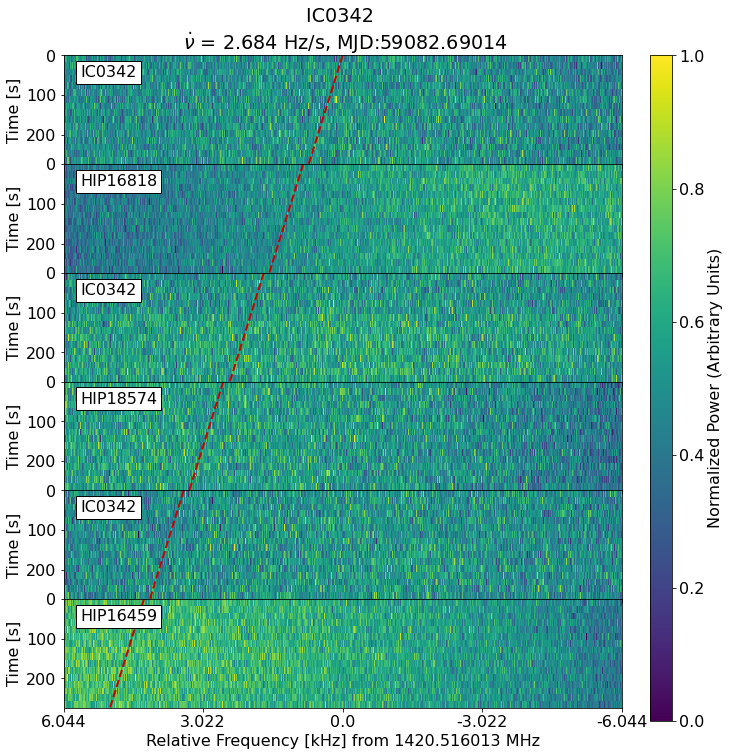

plot_event      INFO     plot_candidate_events: elapsed time = 5.83 seconds
['/datax/scratch/benjb/C23', 'L', 'dats', 'after', '8', 'HDB', 'epochs/C23', 'L', 'csvs', 'offs', 'uncut/340179', 'NGC3193', 'blc05', 'found', 'event', 'table', '3.csv']
340179
NGC3193
blc05
['/datax/scratch/benjb/C23', 'L', 'dats', 'after', '8', 'HDB', 'epochs/C23', 'L', 'csvs', 'offs', 'uncut/340179', 'NGC3193', 'blc07', 'found', 'event', 'table', '3.csv']
340179
NGC3193
blc07
['/datax/scratch/benjb/C23', 'L', 'dats', 'after', '8', 'HDB', 'epochs/C23', 'L', 'csvs', 'offs', 'uncut/340206', 'NGC4473', 'blc01', 'found', 'event', 'table', '3.csv']
340206
NGC4473
blc01
['/datax/scratch/benjb/C23', 'L', 'dats', 'after', '8', 'HDB', 'epochs/C23', 'L', 'csvs', 'offs', 'uncut/340206', 'NGC4473', 'blc06', 'found', 'event', 'table', '3.csv']
340206
NGC4473
blc06
['/datax/scratch/benjb/C23', 'L', 'dats', 'after', '8', 'HDB', 'epochs/C23', 'L', 'csvs', 'offs', 'uncut/340206', 'NGC4473', 'blc07', 'found', 'event', 'table',

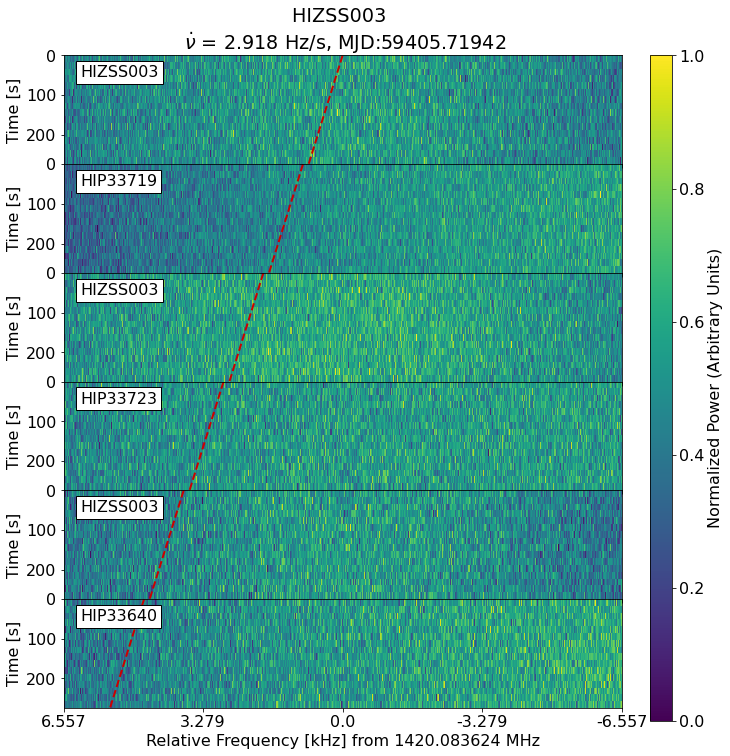

plot_event      INFO     plot_candidate_events: elapsed time = 10.95 seconds
['/datax/scratch/benjb/C23', 'L', 'dats', 'after', '8', 'HDB', 'epochs/C23', 'L', 'csvs', 'offs', 'uncut/395313', 'NGC0628', 'blc04', 'found', 'event', 'table', '3.csv']
395313
NGC0628
blc04
NGC0628 | 1420.555489  |  [0.0, -0.0]
plot_event_pipeline: Opened file /datax/scratch/benjb/C23_L_dats_after_8_HDB_epochs/C23_L_csvs_offs_uncut/395313_NGC0628_blc04_f3_trimmed.csv
plot_event_pipeline: file = blc04_guppi_59405_48425_NGC0628_0040.rawspec.0000.h5, tstart = 59405.56047453704, source_name = NGC0628
plot_event_pipeline: file = blc04_guppi_59405_48747_HIP7930_0041.rawspec.0000.h5, tstart = 59405.56420138889, source_name = HIP7930
plot_event_pipeline: file = blc04_guppi_59405_49069_NGC0628_0042.rawspec.0000.h5, tstart = 59405.567928240744, source_name = NGC0628
plot_event_pipeline: file = blc04_guppi_59405_49388_HIP7867_0043.rawspec.0000.h5, tstart = 59405.57162037037, source_name = HIP7867
plot_event_pipeline: fi

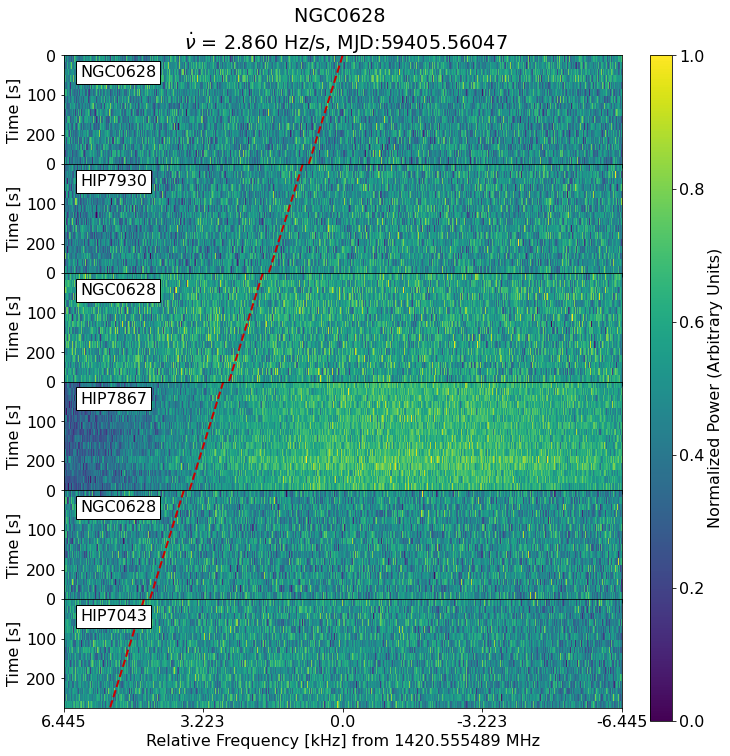

plot_event      INFO     plot_candidate_events: elapsed time = 12.12 seconds
['/datax/scratch/benjb/C23', 'L', 'dats', 'after', '8', 'HDB', 'epochs/C23', 'L', 'csvs', 'offs', 'uncut/395313', 'NGC0628', 'blc05', 'found', 'event', 'table', '3.csv']
395313
NGC0628
blc05
['/datax/scratch/benjb/C23', 'L', 'dats', 'after', '8', 'HDB', 'epochs/C23', 'L', 'csvs', 'offs', 'uncut/395320', 'NGC4136', 'blc00', 'found', 'event', 'table', '3.csv']
395320
NGC4136
blc00
['/datax/scratch/benjb/C23', 'L', 'dats', 'after', '8', 'HDB', 'epochs/C23', 'L', 'csvs', 'offs', 'uncut/395356', 'NGC4826', 'blc00', 'found', 'event', 'table', '3.csv']
395356
NGC4826
blc00
['/datax/scratch/benjb/C23', 'L', 'dats', 'after', '8', 'HDB', 'epochs/C23', 'L', 'csvs', 'offs', 'uncut/395356', 'NGC4826', 'blc01', 'found', 'event', 'table', '3.csv']
395356
NGC4826
blc01
['/datax/scratch/benjb/C23', 'L', 'dats', 'after', '8', 'HDB', 'epochs/C23', 'L', 'csvs', 'offs', 'uncut/395356', 'NGC4826', 'blc05', 'found', 'event', 'table'

In [11]:
# NEED TO REDO THIS FOR:
# NGC4564_16  |  blc04_guppi_59427_00037_NGC4564_0040.rawspec.0000.h5  |  1373.575928
# AND_II_0  |  blc06_guppi_59405_44453_And_II_0028.rawspec.0000.h5  |  1125.00468
# UGCA127_50  |  blc03_guppi_59405_60205_UGCA127_0076.rawspec.0000.h5  |  1559.477272
# HIZSS003_3  |  blc04_guppi_59405_62158_HIZSS003_0082.rawspec.0000.h5  |  1420.083624
# NGC0628_2  |  blc04_guppi_59405_48425_NGC0628_0040.rawspec.0000.h5  |  1420.555489
# USE HIT IDS (i.e. with # after target ID) TO FIND THESE IN csvf_paths

counter = 0
unique_ff_array = []
target_array = []

for csvf_path in csvf_paths:

    #print(csvf_path)
    phr = csvf_path.split('_')
    #for i in range(len(phr)):
    #    print(f'{i}: {phr[i]}')

    print(phr)

    cadence_id = phr[10][6:]

    if ('blc' in phr[12]) | (phr[12] == 'splic'):
        target = phr[11]
        node = phr[12]
    else:
        target = phr[11]+'_'+phr[12]
        node = phr[13]
    
    print(cadence_id)
    print(target)
    print(node)
    #break
    #continue

    h5_list_path = '/datax/scratch/benjb/C23_L_dats_after_8_HDB_epochs/C23_L_lsts_offs_uncut/'+cadence_id+'_'+target+'_'+node+'_h5_files.lst'

    c23_freqs = c23_dfl.iloc[np.where(c23_dfl['Source'].values==target)[0]]['Freq'].values
    #print(target)
    #print(c23_freqs)
    #continue

    event_df = pd.read_csv(csvf_path)
    trimmed_event_df = event_df.iloc[
    np.where((event_df['Freq'].values > 1100) & (event_df['Freq'].values < 1200) |
             (event_df['Freq'].values > 1340) & (event_df['Freq'].values < 1900))[0]
    ]
    trimmed_event_df.dropna(subset=['in_n_ons'], inplace=True)

    for ii, ff in enumerate(trimmed_event_df['Freq'].values):
        c23_freqs_diff = [round(f - ff, 0) for f in c23_freqs]
        print(f'{target} | {ff}  |  {c23_freqs_diff}')
        #if not 0.0 in c23_freqs_diff:
        trimmed_event_df.to_csv(f'/datax/scratch/benjb/C23_L_dats_after_8_HDB_epochs/C23_L_csvs_offs_uncut/{cadence_id}_{target}_{node}_f3_trimmed.csv')
        tcsvf_path = f'/datax/scratch/benjb/C23_L_dats_after_8_HDB_epochs/C23_L_csvs_offs_uncut/{cadence_id}_{target}_{node}_f3_trimmed.csv'
        #print(f'    {trimmed_event_df["Hit_ID"].values[ii]}  |  {ff}')
        counter += 1
        plot_event_pipeline(tcsvf_path, # full path of the CSV file built by find_event_pipeline()
                h5_list_path, # full path of text file containing the list of .h5 files
                filter_spec='f{}'.format(3), # filter threshold
                user_validation=False, # Non-interactive
                plot_dir='/datax/scratch/benjb/C23_L_dats_after_8_HDB_epochs/C23_L_pngs_offs_uncut/') 
        target_array.append(target)
            #unique_ff_array.append(ff)

print(counter)

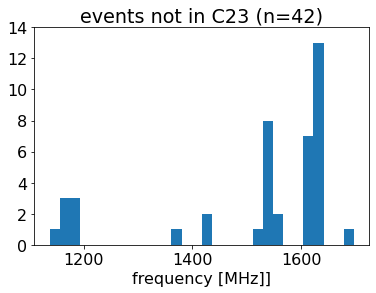

In [79]:
#plt.hist(unique_ff_array, 
#         #histtype='step', 
#         linewidth=3, 
#         bins=30)
#plt.yticks([0,2,4,6,8,10,12,14])
#plt.xlabel('frequency [MHz]]')
#plt.title(f'events not in C23 (n={len(unique_ff_array)})')
#plt.show()

In [80]:
#for i in range(42):
#    print(f'{target_array[i]}: {unique_ff_array[i]}')

AND_XIV: 1373.543947
LEOII: 1166.219752
NGC4258: 1618.326573
NGC4258: 1618.078139
NGC4473: 1626.43519
NGC1052: 1626.113797
NGC1407: 1522.063823
NGC1407: 1173.773364
NGC4478: 1545.283444
MESSIER84: 1618.298105
NGC4551: 1618.173709
NGC4551: 1534.015087
NGC5846: 1420.345095
NGC5845: 1626.102777
NGC5845: 1626.099089
NGC4365: 1539.770599
NGC4365: 1536.840912
NGC4434: 1626.427252
NGC4434: 1176.859251
UGC04879: 1182.335945
NGC4618: 1549.866691
NGC3344: 1538.150274
NGC3344: 1538.140149
NGC3344: 1538.133424
AND_XXIII: 1697.601311
WLM: 1561.346001
WLM: 1539.77058
WLM: 1175.820116
AND_II: 1626.074536
NGC0628: 1619.412518
NGC2683: 1626.119399
DW1: 1137.182227
MAFFEI2: 1626.471682
MAFFEI1: 1420.713323
NGC6503: 1626.297545
NGC6503: 1624.880849
NGC6503: 1618.167691
NGC4489: 1618.417094
MESSIER033: 1626.101632
MESSIER033: 1161.199397
SEXA: 1626.296578
NGC1400: 1626.119692


In [9]:
pngs = glob.glob('/datax/scratch/benjb/C23_L_dats_after_8_HDB_epochs/C23_L_pngs/*')
print(len(pngs))

51


In [117]:
#c23_dfl.iloc[np.where(c23_dfl['Source'].values == 'AND_XXIII')[0]]

,Unnamed: 0,Unnamed: 0.1,TopHitNum,DriftRate,SNR,Freq,ChanIndx,FreqStart,FreqEnd,CoarseChanNum,...,DELTAF,max_drift_rate,obs_length,Hit_ID,status,in_n_ons,RFI_in_range,delta_t,Band,FilePath
4659,0,13,14,-1.721968,21.199158,1626.123936,471541,1626.12557,1626.122307,21,...,-2.793968,4.0,292.057776,AND_XXIII_13,on_table_1,2.0,0,0.0,L,/home/obs/events/395278/1688/found_event_table...


In [8]:
c23_ff_array = c23_dfl['Freq'].values

In [128]:
#np.max(ff_array)

1697.601311

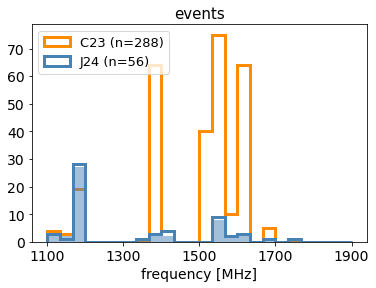

In [24]:
plt.hist(c23_ff_array, 
         histtype='step', 
         color='darkorange',
         linewidth=3, 
         bins=24,
         range=(1100,1900),
         label=f'C23 (n={len(c23_ff_array)})')
plt.hist(unique_ff_array, 
         histtype='stepfilled', 
         color='steelblue',
         alpha=0.5,
         #linewidth=1, 
         bins=24,
         range=(1100,1900))
plt.hist(ff_array, 
         histtype='step', 
         color='steelblue',
         linewidth=3, 
         linestyle='solid',
         bins=24,
         range=(1100,1900),
         label=f'J24 (n={len(ff_array)})')
#plt.yticks([0,2,4,6,8,10,12,14])
plt.xlabel('frequency [MHz]', size=14)
plt.xticks(ticks=np.array([1100, 1300, 1500, 1700, 1900]), fontsize=14)
plt.yticks(fontsize=14)
plt.title(f'events', size=15)
plt.legend(loc='upper left', fontsize=13)
#plt.grid(axis='y')
plt.savefig('/datax/scratch/benjb/C23_L_full_run_event_comparison_091324.pdf', bbox_inches='tight')
plt.show()